<a href="https://colab.research.google.com/github/aqillakhamis/Deep-Learning-Practice/blob/master/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Build Neural Network Model using Keras Framework**

Mobile Price Classification

## Import Dependent Libraries

In [0]:
#Dependencies 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Import Dataset

In [17]:
dataset = pd.read_csv('data/train.csv')
dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [0]:
#changing dataframe to numpy array 
X = dataset.iloc[:,:20].values  # features 
Y = dataset.iloc[:,20:21].values # classes 

## Pre-Processing Dataset

In [0]:
#normalizing the data 
#change value of an array to a common scale, without distorting differences in the ranges of values 
sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
#one hot encoded - convert integer classes into binary values 
#(n, number of classes) 
#n = number of samples in dataset 

OHE = OneHotEncoder()
Y = OHE.fit_transform(Y).toarray()

## Split the Dataset into Training and Testing

In [0]:
#train data = 90%
#test data = 10%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

## Building Neural Network

In [0]:
#Dependencies 
import keras
from keras.models import Sequential
from keras.layers import Dense

#Neural Network Model 
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu')) #hidden layer 1 = 16 neurons
model.add(Dense(12, activation='relu')) #hidden layer 2 = 12 neurons 
model.add(Dense(4, activation='softmax')) #output layer 4 neurons 

#specify loss function and optimizer 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=64)

Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 86us/step - loss: 1.4671 - accuracy: 0.3133 - val_loss: 1.3115 - val_accuracy: 0.4000
Epoch 2/100
1800/1800 [==============================] - 0s 43us/step - loss: 1.3228 - accuracy: 0.3717 - val_loss: 1.2482 - val_accuracy: 0.4200
Epoch 3/100
1800/1800 [==============================] - 0s 43us/step - loss: 1.2547 - accuracy: 0.4267 - val_loss: 1.1893 - val_accuracy: 0.4450
Epoch 4/100
1800/1800 [==============================] - 0s 43us/step - loss: 1.1877 - accuracy: 0.4744 - val_loss: 1.1209 - val_accuracy: 0.5050
Epoch 5/100
1800/1800 [==============================] - 0s 47us/step - loss: 1.1149 - accuracy: 0.5128 - val_loss: 1.0488 - val_accuracy: 0.5500
Epoch 6/100
1800/1800 [==============================] - 0s 43us/step - loss: 1.0372 - accuracy: 0.5594 - val_loss: 0.9717 - val_accuracy: 0.5850
Epoch 7/100
1800/1800 [==============================] - 0s 47us/step - loss:

In [0]:
y_pred = model.predict(x_test)

## Inverse One-Hot-Encoding Process

In [0]:
#convert prediction to label 
pred = list()
for i in range(len(y_pred)): 
  pred.append(np.argmax(y_pred[i]))

#converting one hot encoded test label to label 
test = list()
for i in range(len(y_test)): 
  test.append(np.argmax(y_test[i]))

In [26]:
accuracy = accuracy_score(pred,test)
print('Accuracy Model is:', accuracy*100)

Accuracy Model is: 91.5


## Visualize Training and Validation Losses Accuracies

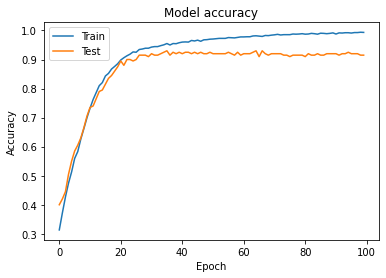

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

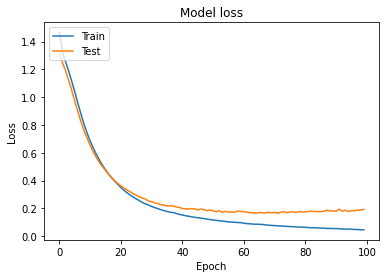

In [31]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()